Numero totale di token: 204935
Media di token per file: 582.20
Numero minimo di token in un file JSON: 42
Numero massimo di token in un file JSON: 3073


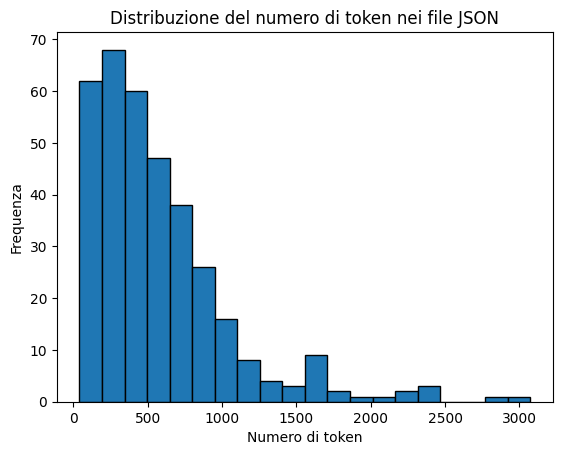

In [3]:
import os
import json
import matplotlib.pyplot as plt

directory_path = "articles"  # Assicurati di specificare il percorso corretto

# Elencare tutti i file nella directory
file_list = os.listdir(directory_path)

total_token_count = 0
total_json_files = 0
min_token_count = float('inf')
max_token_count = 0
token_counts = []

# Iterare attraverso i file JSON
for file_name in file_list:
    if file_name.endswith(".json"):
        file_path = os.path.join(directory_path, file_name)

        # Leggere il contenuto del file JSON
        with open(file_path, 'r') as json_file:
            data = json.load(json_file)

            # Verificare se l'attributo "text" esiste nel file JSON
            if 'text' in data:
                # Contare i token nell'attributo "text" e aggiungerli alla lista
                token_count = len(data['text'].split())
                token_counts.append(token_count)

                # Aggiornare il numero totale di token
                total_token_count += token_count

                # Aggiornare il numero minimo e massimo di token
                min_token_count = min(min_token_count, token_count)
                max_token_count = max(max_token_count, token_count)

                # Incrementare il conteggio dei file JSON
                total_json_files += 1

# Calcolare la media
if total_json_files > 0:
    average_token_count = total_token_count / total_json_files
    print(f"Numero totale di token: {total_token_count}")
    print(f"Media di token per file: {average_token_count:.2f}")
    print(f"Numero minimo di token in un file JSON: {min_token_count}")
    print(f"Numero massimo di token in un file JSON: {max_token_count}")
else:
    print("Nessun file con estensione '.json' trovato nella directory specificata.")

# Tracciare la distribuzione
plt.hist(token_counts, bins=20, edgecolor='black')
plt.title('Distribuzione del numero di token nei file JSON')
plt.xlabel('Numero di token')
plt.ylabel('Frequenza')
plt.show()


# Tiktoken


### ESEMPIO PRESO DALLA DOCUMENTAZIONE
### https://github.com/openai/tiktoken

Numero totale di token: 377396
Media di token per file: 1072.15
Numero minimo di token in un file JSON: 87
Numero massimo di token in un file JSON: 5852


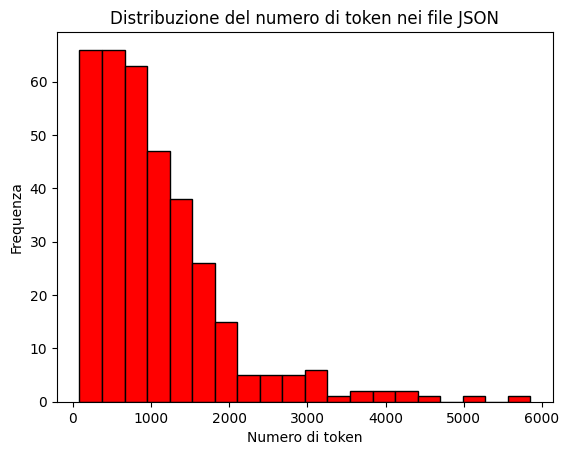

In [1]:
import os
import json
import matplotlib.pyplot as plt
import tiktoken
encoding = tiktoken.get_encoding("cl100k_base")
encoding = tiktoken.encoding_for_model("gpt-3.5-turbo")
import aiohttp

async def async_encode_wrapper(encoding, string, session):
    return encoding.encode(string)


async def num_tokens_from_string_async(string: str, encoding_name: str) -> int:
    """Returns the number of tokens in a text string."""
    async with aiohttp.ClientSession() as session:
        encoding = tiktoken.get_encoding(encoding_name)
        encoded_result = await async_encode_wrapper(encoding, string, session)
        num_tokens = len(encoded_result)
    return num_tokens


directory_path = "articles"  # Assicurati di specificare il percorso corretto

# Elencare tutti i file nella directory
file_list = os.listdir(directory_path)

total_token_count = 0
total_json_files = 0
min_token_count = float('inf')
max_token_count = 0
token_counts = []

# Iterare attraverso i file JSON
for file_name in file_list:
    if file_name.endswith(".json"):
        file_path = os.path.join(directory_path, file_name)

        # Leggere il contenuto del file JSON
        with open(file_path, 'r') as json_file:
            data = json.load(json_file)

            # Verificare se l'attributo "text" esiste nel file JSON
            if 'text' in data:
                # Contare i token nell'attributo "text" e aggiungerli alla lista
                #token_count = len(data['text'].split())
                token_count = await num_tokens_from_string_async(data['text'], "cl100k_base")
                token_counts.append(token_count)

                # Aggiornare il numero totale di token
                total_token_count += token_count

                # Aggiornare il numero minimo e massimo di token
                min_token_count = min(min_token_count, token_count)
                max_token_count = max(max_token_count, token_count)

                # Incrementare il conteggio dei file JSON
                total_json_files += 1

# Calcolare la media
if total_json_files > 0:
    average_token_count = total_token_count / total_json_files
    print(f"Numero totale di token: {total_token_count}")
    print(f"Media di token per file: {average_token_count:.2f}")
    print(f"Numero minimo di token in un file JSON: {min_token_count}")
    print(f"Numero massimo di token in un file JSON: {max_token_count}")
else:
    print("Nessun file con estensione '.json' trovato nella directory specificata.")

# Tracciare la distribuzione
plt.hist(token_counts, bins=20, edgecolor='black', color='red')
plt.title('Distribuzione del numero di token nei file JSON')
plt.xlabel('Numero di token')
plt.ylabel('Frequenza')
plt.show()
